In [5]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import random
import statistics
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.stats import ttest_ind_from_stats
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from helperFunctions import createDataSet, prepare_features_target
import os

In [6]:
year = 2020
file_num = 1
DATA_PATH = f"/Users/nathanhoffman/Library/Mobile Documents/com~apple~CloudDocs/UniBe/3. Semester/Data Driven Diabetes Management/DDDM-Project7/data/Ohio{year}_processed/train"
files = os.listdir(DATA_PATH)
file = files[file_num]
train_set_list, scaler = createDataSet(os.path.join(DATA_PATH, file))
# Remove duplicates
train_set_list = [train_set_list[x] for x, _ in enumerate(train_set_list) if train_set_list[x].equals(train_set_list[x-1]) is False]
train_set = pd.concat(train_set_list)

DATA_PATH = f"/Users/nathanhoffman/Library/Mobile Documents/com~apple~CloudDocs/UniBe/3. Semester/Data Driven Diabetes Management/DDDM-Project7/data/Ohio{year}_processed/test"
files = os.listdir(DATA_PATH)
file = files[file_num]
test_set_list, scaler = createDataSet(os.path.join(DATA_PATH, file), scaler=scaler)
# Remove duplicates
test_set_list = [test_set_list[x] for x, _ in enumerate(test_set_list) if test_set_list[x].equals(test_set_list[x-1]) is False]
test_set = pd.concat(test_set_list)

print(f"Length of train set: {len(train_set_list)}")
print(f"Length of test set: {len(test_set_list)}")
train_set_list[0]

Length of train set: 2
Length of test set: 4


cbg  finger  carbInput  bolus  finger_extended  minAfterMeal  mealSize  \
0   107.0   117.0        0.0    0.0            117.0            25       0.0   
1   109.0     0.0       75.0    9.8            117.0             0      75.0   
2   112.0     0.0        0.0    0.0            117.0             5      75.0   
3   113.0     0.0        0.0    0.0            117.0            10      75.0   
4   114.0     0.0        0.0    0.0            117.0            15      75.0   
5   118.0     0.0        0.0    0.0            117.0            20      75.0   
6   125.0     0.0        0.0    0.0            117.0            25      75.0   
7   133.0     0.0        0.0    0.0            117.0            30      75.0   
8   143.0     0.0        0.0    0.0            117.0            35      75.0   
9   150.0     0.0        0.0    0.0            117.0            40      75.0   
10  156.0     0.0        0.0    0.0            117.0            45      75.0   
11  168.0     0.0        0.0    0.0            117.0            50      75.0   
12  175.0     0.0        0.0    0.0            117.0            55      75.0   
13  175.0     0.0        0.0    0.0            117.0            60      75.0   
14  180.0     0.0        0.0    0.0            117.0            65      75.0   
15  181.0     0.0        0.0    0.0            117.0            70      75.0   
16  184.0     0.0        0.0    0.0            117.0            75      75.0   
17  188.0     0.0        0.0    0.0            117.0            80      75.0   
18  191.0     0.0        0.0    0.0            117.0            85      75.0   
19  189.0     0.0        0.0    2.1            117.0            90      75.0   
20  189.0     0.0        0.0    0.0            117.0            95      75.0   
21  189.0     0.0        0.0    0.0            117.0           100      75.0   
22  186.0     0.0        0.0    0.0            117.0           105      75.0   
23  184.0     0.0        0.0    0.0            117.0           110      75.0   
24  180.0     0.0        0.0    0.0              0.0           115      75.0   
25  173.0     0.0        0.0    0.0              0.0           120      75.0   
26  167.0     0.0        0.0    0.0              0.0           125      75.0   
27  161.0     0.0        0.0    0.0              0.0           130      75.0   
28  151.0     0.0        0.0    0.0              0.0           135      75.0   
29  144.0     0.0        0.0    1.1              0.0           140      75.0   
30  139.0     0.0        0.0    0.0              0.0           145      75.0   
31  133.0     0.0       26.0    0.0              0.0             0      26.0   
32  131.0     0.0        0.0    0.0              0.0             5      26.0   
33  131.0     0.0        0.0    2.3              0.0            10      26.0   
34  133.0     0.0        0.0    0.0              0.0            15      26.0   
35  135.0     0.0        0.0    0.0              0.0            20      26.0   
36  137.0     0.0        0.0    0.0              0.0            25      26.0   
37  139.0     0.0        0.0    1.0              0.0            30      26.0   
38  138.0     0.0        0.0    0.0              0.0            35      26.0   
39  135.0     0.0        0.0    0.0              0.0            40      26.0   
40  139.0     0.0        0.0    0.0              0.0            45      26.0   
41  141.0     0.0        0.0    0.0              0.0            50      26.0   
42  140.0     0.0        0.0    0.0              0.0            55      26.0   
43  136.0     0.0        0.0    0.0              0.0            60      26.0   
44  129.0     0.0        0.0    0.0              0.0            65      26.0   
45  133.0     0.0        0.0    0.0              0.0            70      26.0   
46  139.0     0.0        0.0    0.0              0.0            75      26.0   
47  146.0     0.0        0.0    0.0              0.0            80      26.0   
48  148.0     0.0        0.0    0.0              0.0            85      26.0   
49  14

In [3]:
def subsample_df(df, start=0, stop=-1, subsamples = 1):
    df = pd.concat([df[start:stop:subsamples], df.tail(1)])
    return df

def reconstruct_samples(df, numOfValues, interpolation = "interp1d", degree = 5):
    x = df.index.values
    y = df.values
    if interpolation == "interp1d":
        f = interpolate.interp1d(x, y)
    elif interpolation == "cubicspline":
        f = interpolate.CubicSpline(x, y)
    elif interpolation == "polyfit":
        # Polynomial fitting
        coefficients = np.polyfit(x, y, degree)  # Fit polynomial of given degree
        f = lambda x_new: np.polyval(coefficients, x_new)  # Polynomial evaluation
    else:
        raise ValueError(f"Unsupported interpolation method: {interpolation}")
    

    
    xnew = np.arange(x[0], x[-1]+1, numOfValues)
    ynew = f(xnew)
    return xnew, ynew

def create_statistics(df, reconstruction):
    length = len(reconstruction) if len(df) > len(reconstruction) else len(df) 
    mse = np.mean((df[:length].values - reconstruction[:length])**2)
    return mse

def create_standard_metrics(train_set: list):
    total_stats = {}

    train_cbg = pd.concat(train_set).cbg
    number_of_samples = len(train_cbg)
    true_mean = train_cbg.mean()
    true_std = train_cbg.std()
    
    subsampling = [1, 2, 4, 8, 16, 32]
    interpolation = "cubicspline"

    def create_dict(mean, std, times, mse = None):
        dictonary = {"Mean": mean,
                "Std": std,
                "Times": times}
        if mse:
            dictonary["MSE"] = statistics.median(mse)

        # Transform the dictionary
        times_data = dictonary.pop("Times")  # Remove "Times" and get its dictionary
        dictonary.update(times_data)        # Add the key-value pairs from "Times"
        return dictonary
    
    def create_times(s):
        times = {
            "Time in range (70-180)" : len(s[(s >= 70) & (s <= 180)])/len(s),
            "Time in tight range (70-140)" : len(s[(s >= 70) & (s <= 140)])/len(s),
            "Time in low (<70)" : len(s[(s < 70)])/len(s),
            "Time in very low (<54)" : len(s[(s < 54)])/len(s),
            "Time in high (>180)" : len(s[(s > 180)])/len(s),
            "Time in very high (>250)" : len(s[(s > 250)])/len(s),
        }

        return times
    true_times = create_times(train_cbg)
    total_stats["True"] = create_dict(true_mean, true_std, true_times)

    for sub in subsampling:
        recon_list = []
        mse_list = []
        for i, data in enumerate(train_set):
            data = data.cbg
            subsampled_values = subsample_df(data, start=0, stop=-1, subsamples=sub)
            samples_reconstructed = reconstruct_samples(subsampled_values, 1, interpolation)

            recon_list.append(pd.Series(samples_reconstructed[1]))

            if i % 106 == 0:
                plt.figure()
                plt.plot(data.index.values*5/60, data)
                plt.plot(subsampled_values.index.values*5/60, subsampled_values, "r*")
                plt.plot(samples_reconstructed[0]*5/60, samples_reconstructed[1], '--')
                plt.xlabel("Time [h]")
                plt.ylabel("CBG [mg/dl]")
                plt.title(f"{interpolation} Subsampling rate: {sub}")

            mse = create_statistics(data, samples_reconstructed[1])
            mse_list.append(mse)
        recon = pd.concat(recon_list)
        recon_mean = recon.mean()
        recon_std = recon.std()
        recon_times = create_times(recon)
        total_stats[f"Subsampling rate {sub}"] = create_dict(recon_mean, recon_std, recon_times, mse_list)


    return total_stats, number_of_samples

563-ws-training_processed.csv
Number of Time Series: 59
Sample 13534 is out of range
588-ws-training_processed.csv
Number of Time Series: 128
575-ws-training_processed.csv
Number of Time Series: 48


/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3905207352.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


559-ws-training_processed.csv
Number of Time Series: 10
591-ws-training_processed.csv
Number of Time Series: 105
Sample 12128 is out of range
570-ws-training_processed.csv
Number of Time Series: 110
540-ws-training_processed.csv
Number of Time Series: 13
552-ws-training_processed.csv
Number of Time Series: 2
567-ws-training_processed.csv
Number of Time Series: 2
584-ws-training_processed.csv
Number of Time Series: 2
Sample 13199 is out of range
544-ws-training_processed.csv
Number of Time Series: 90
Sample 14036 is out of range
596-ws-training_processed.csv
Number of Time Series: 17


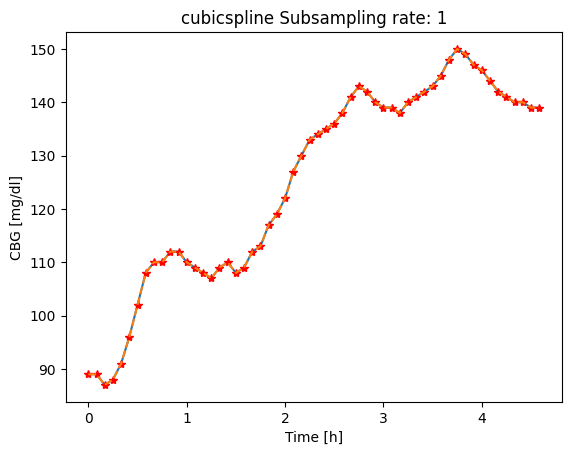

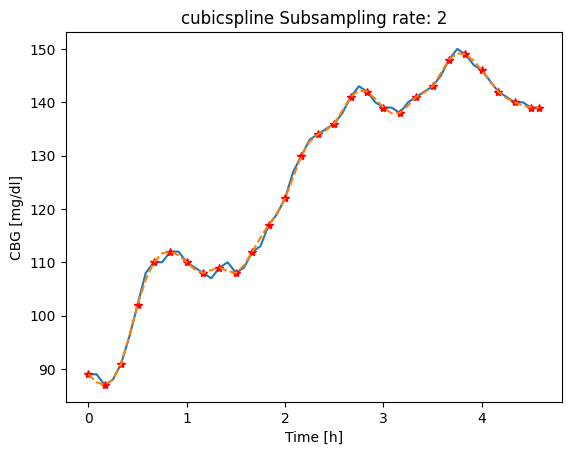

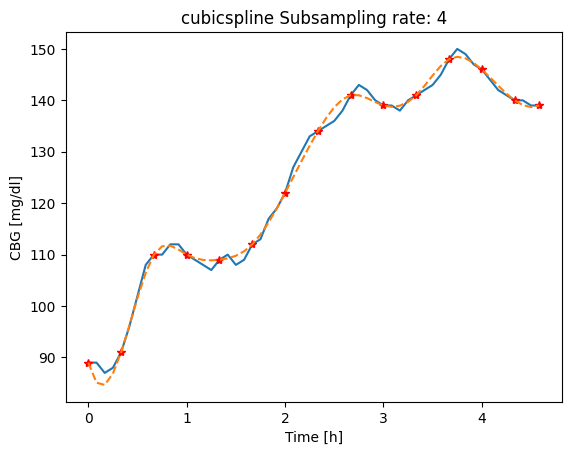

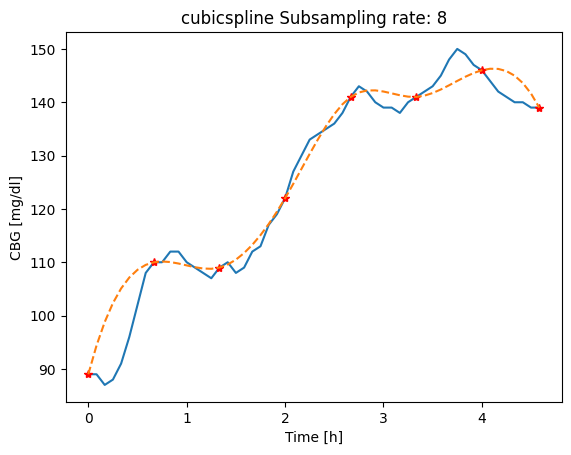

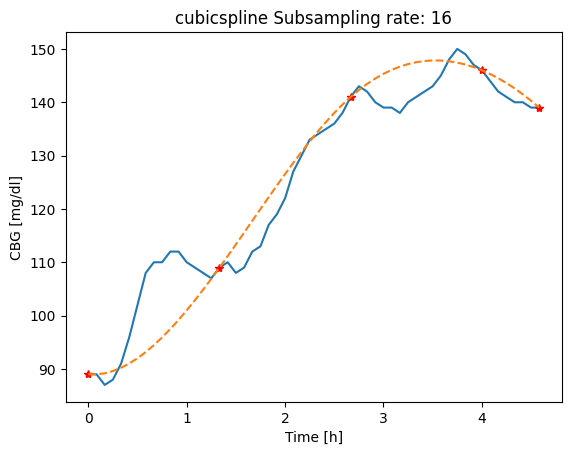

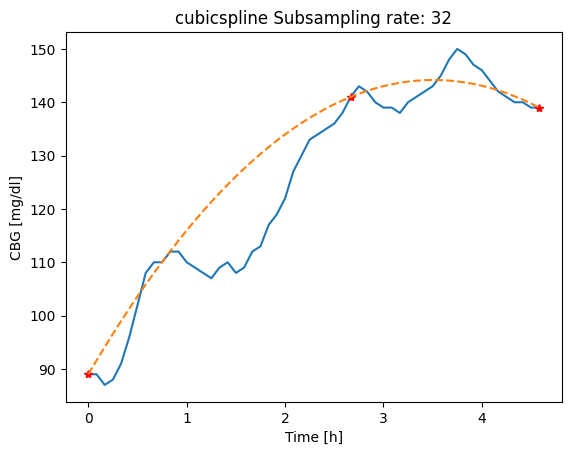

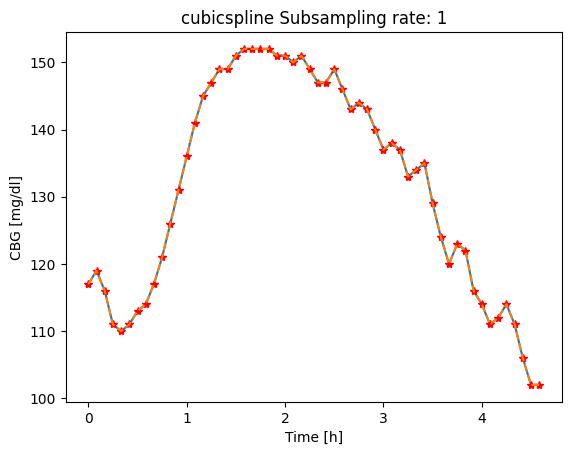

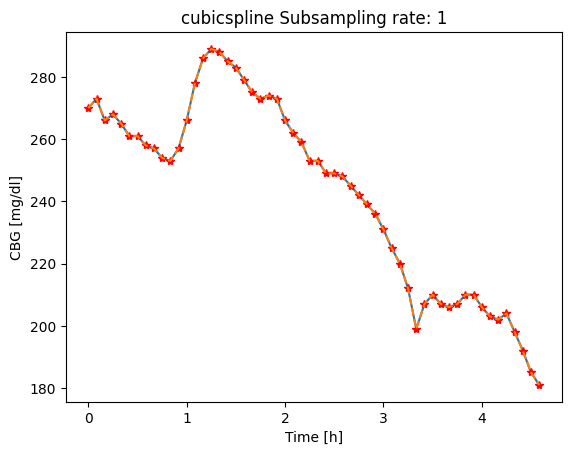

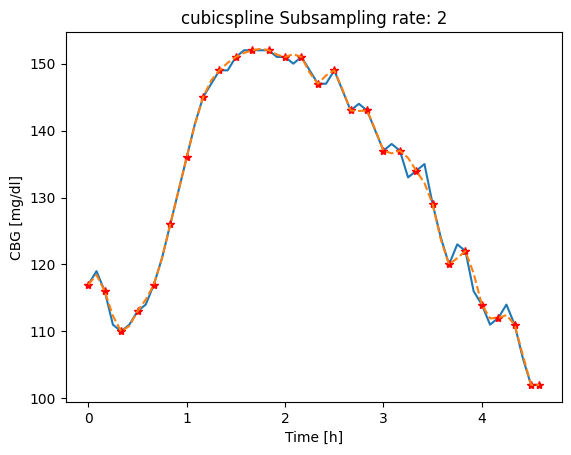

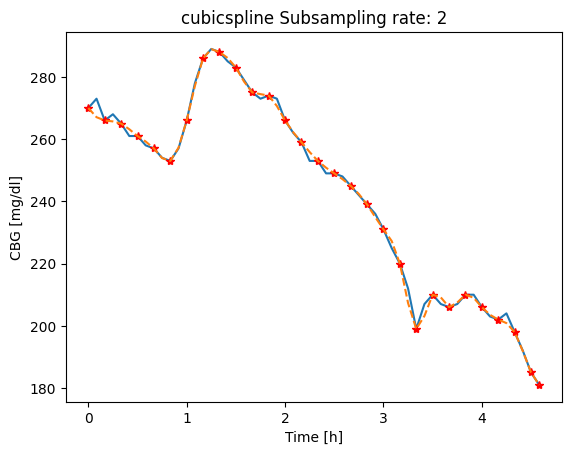

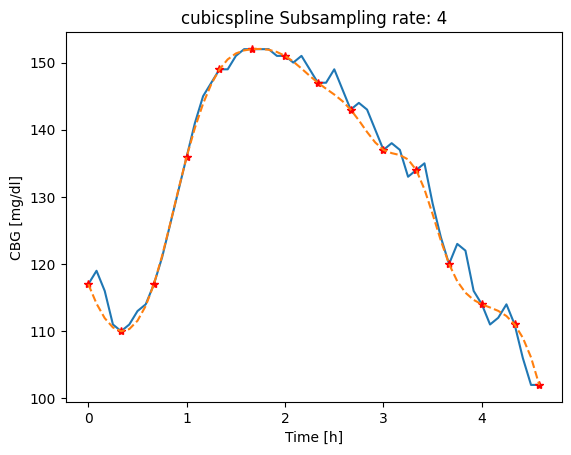

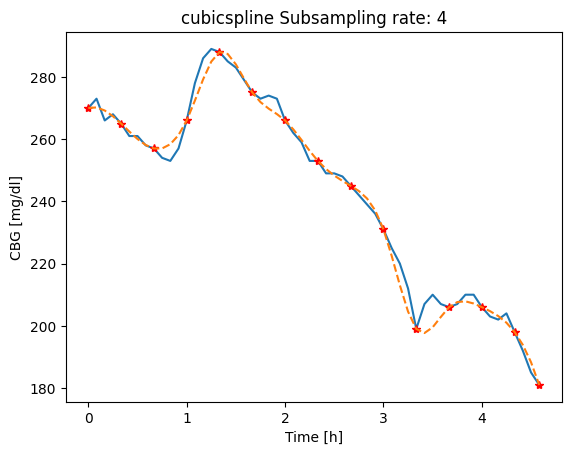

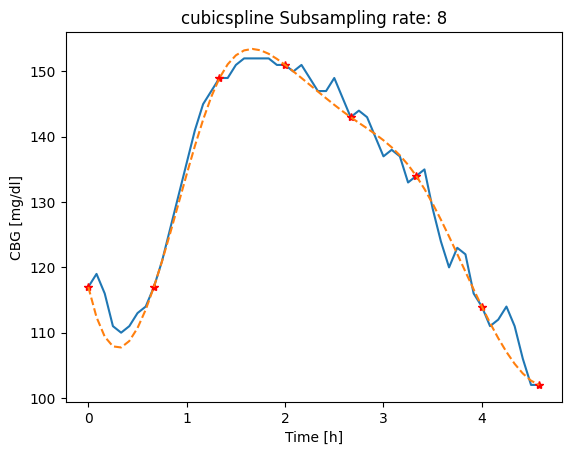

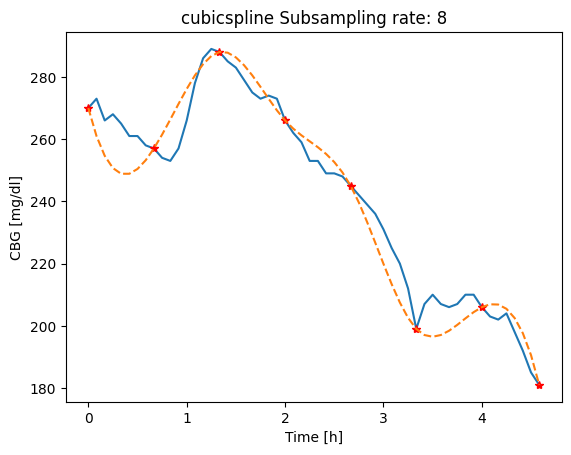

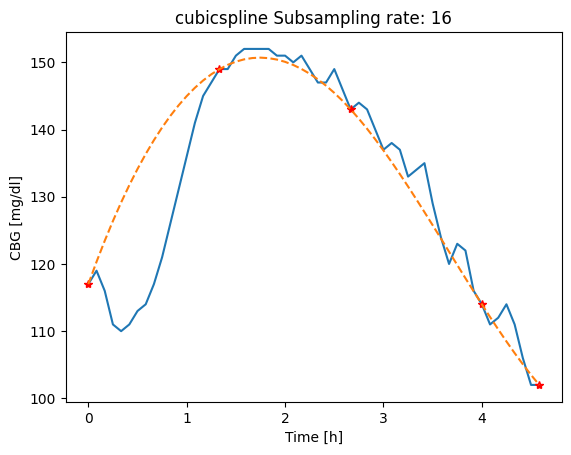

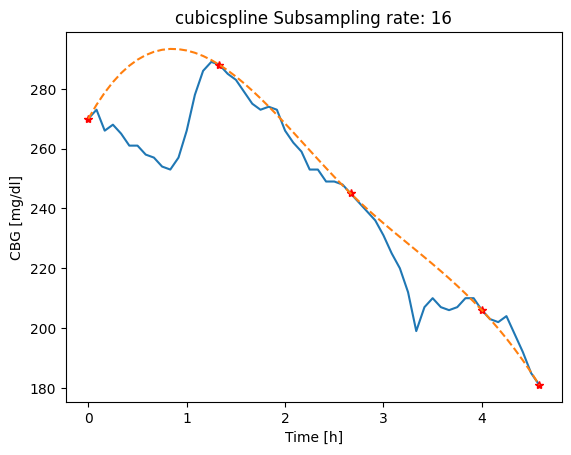

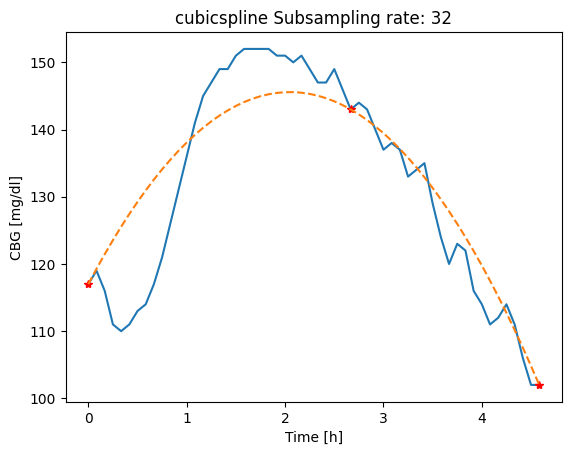

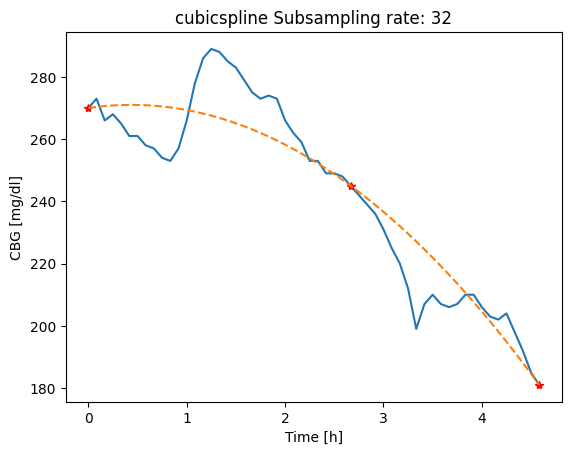

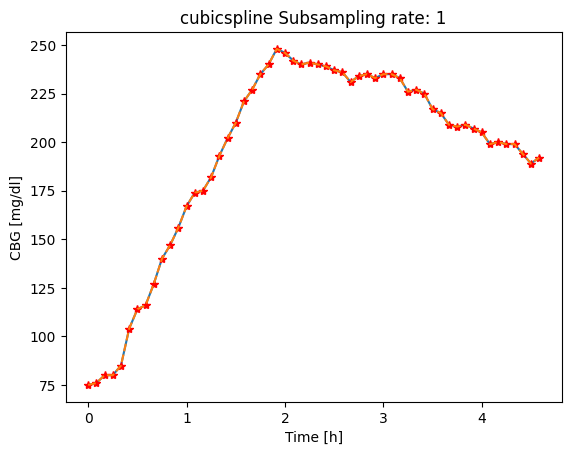

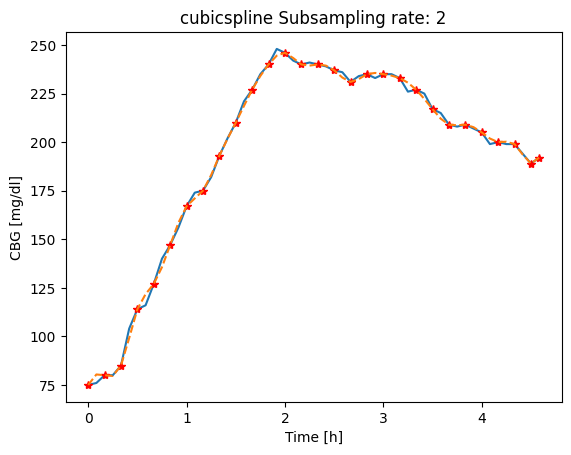

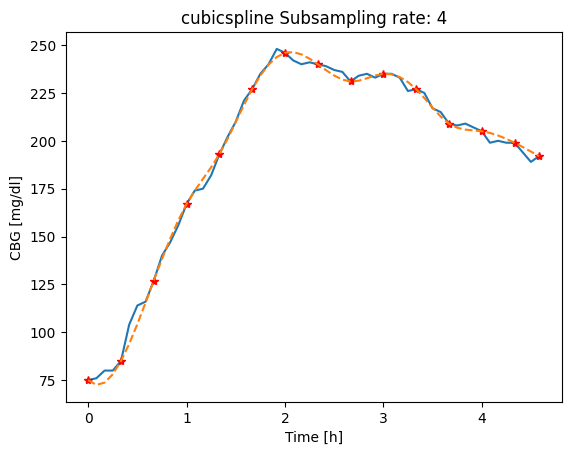

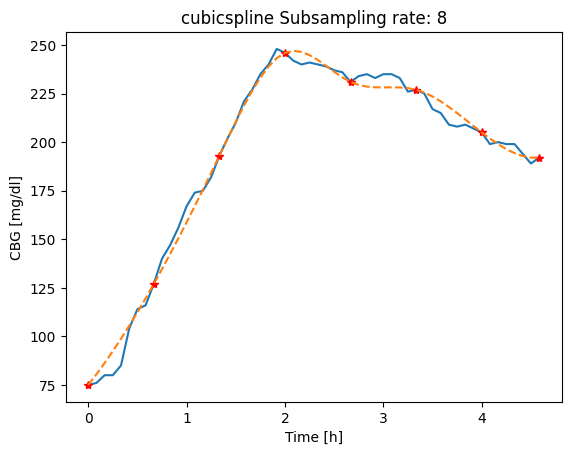

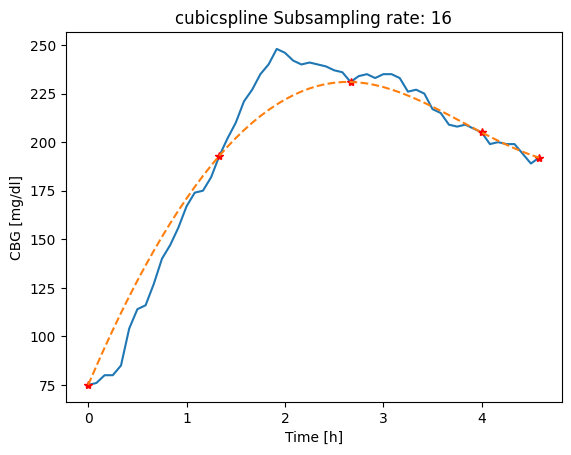

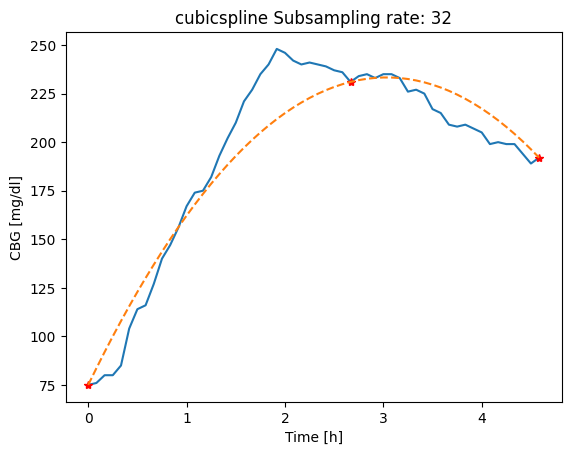

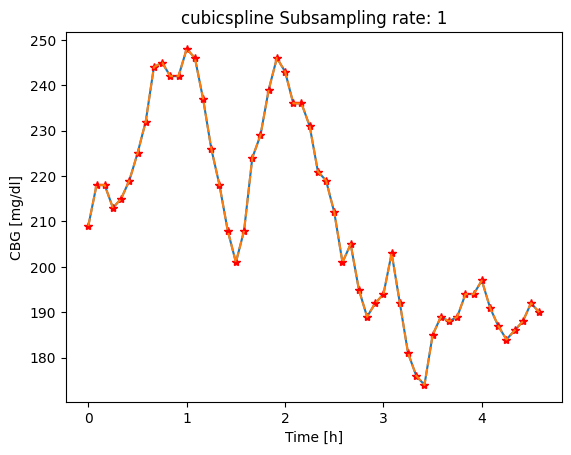

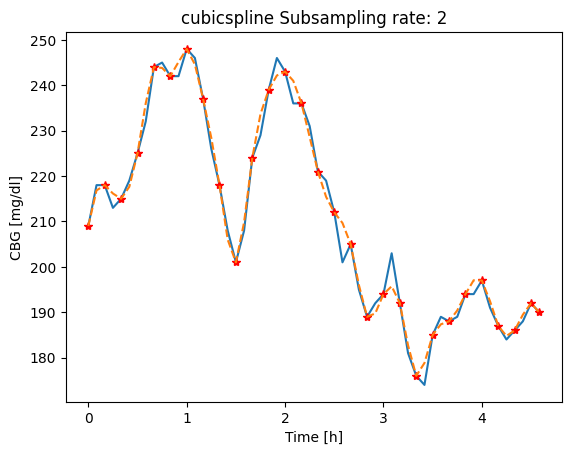

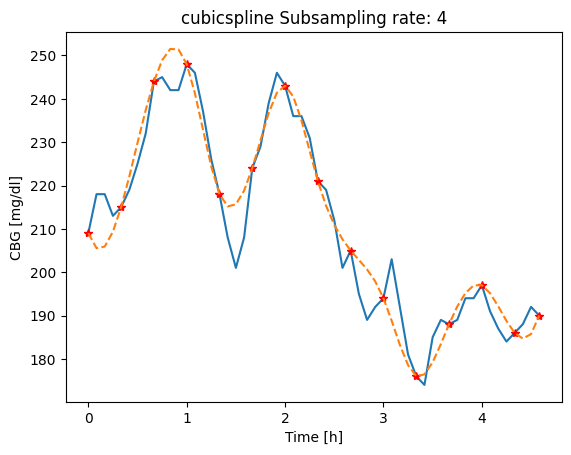

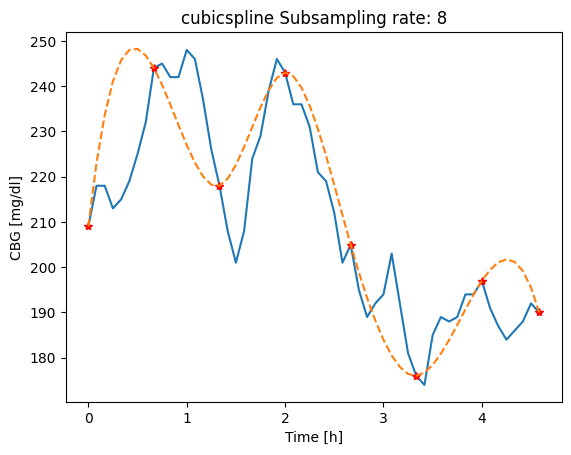

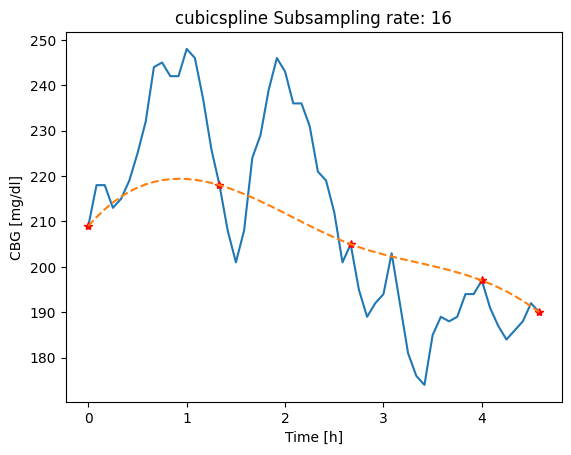

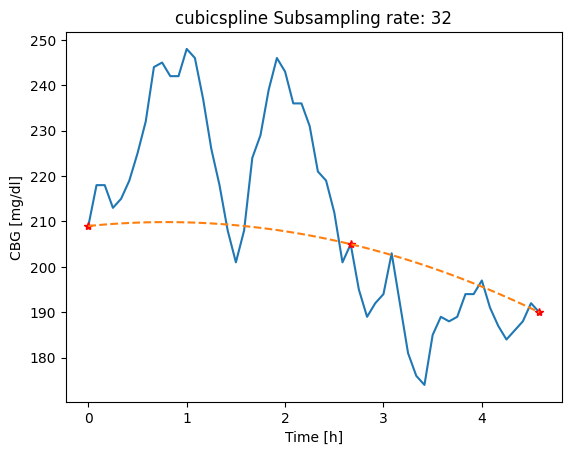

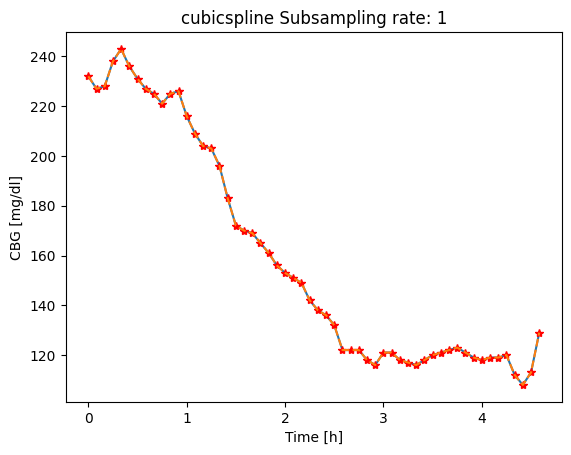

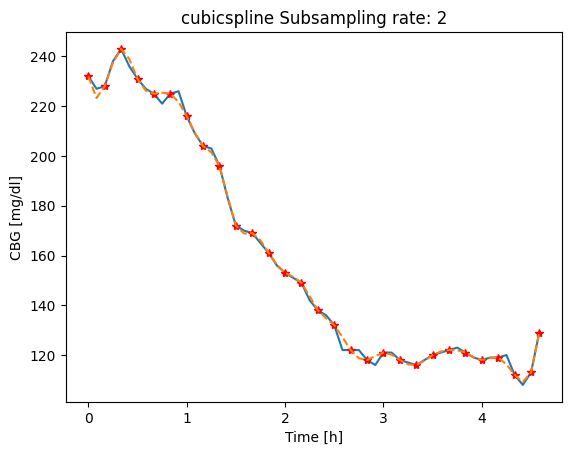

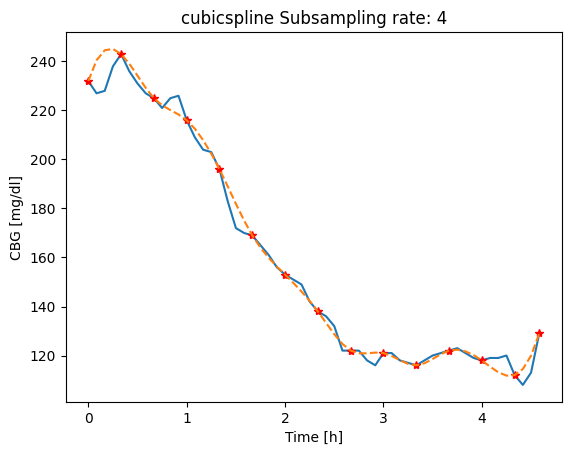

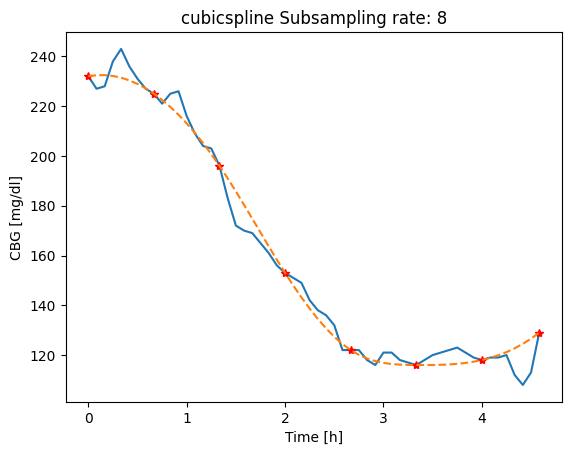

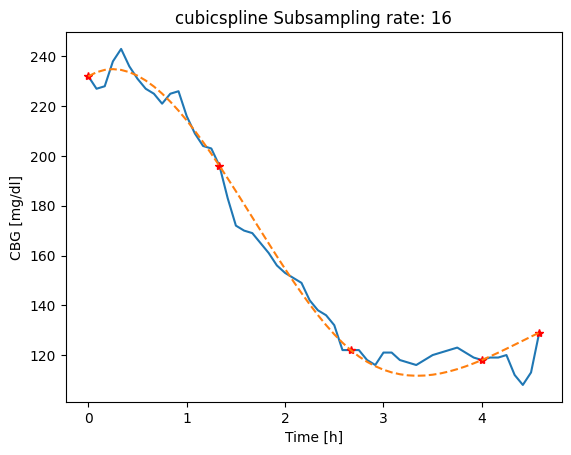

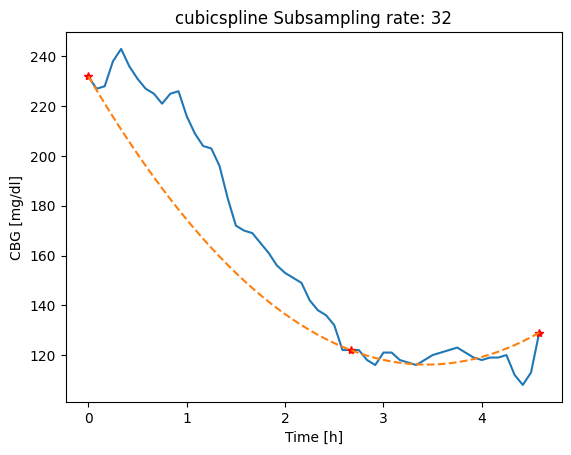

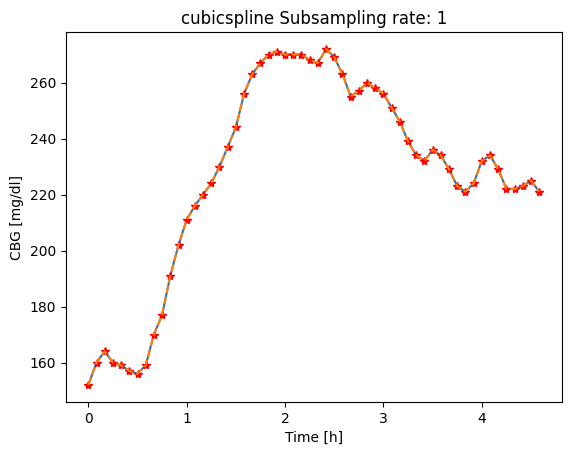

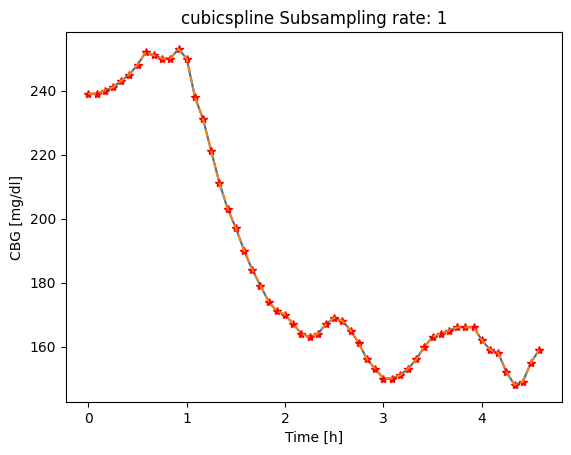

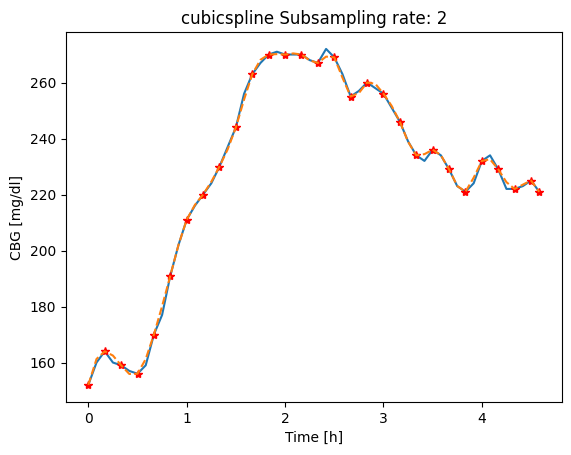

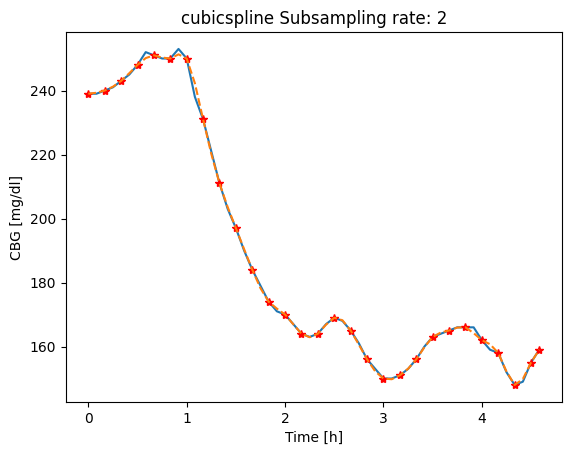

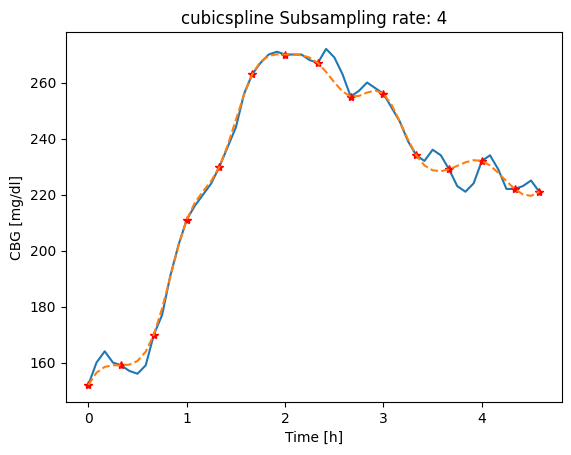

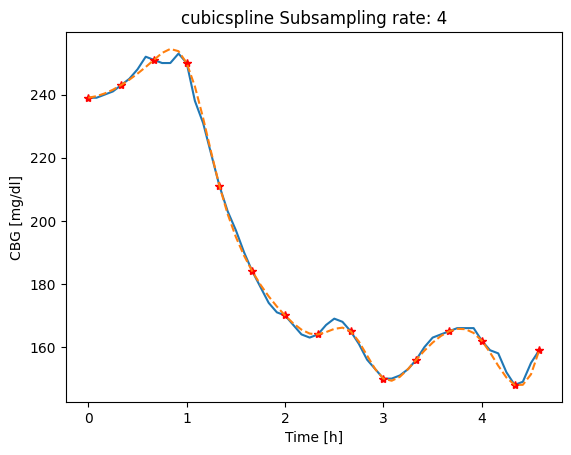

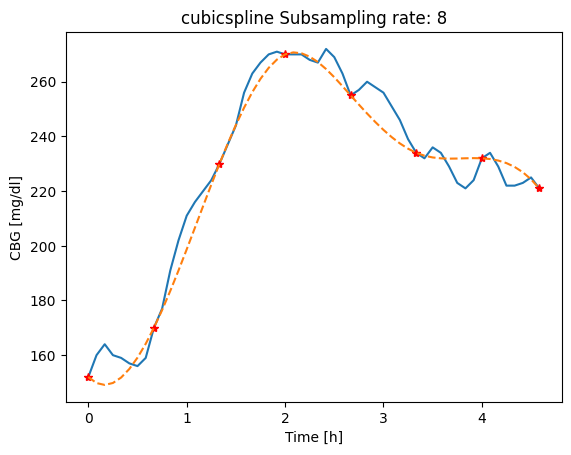

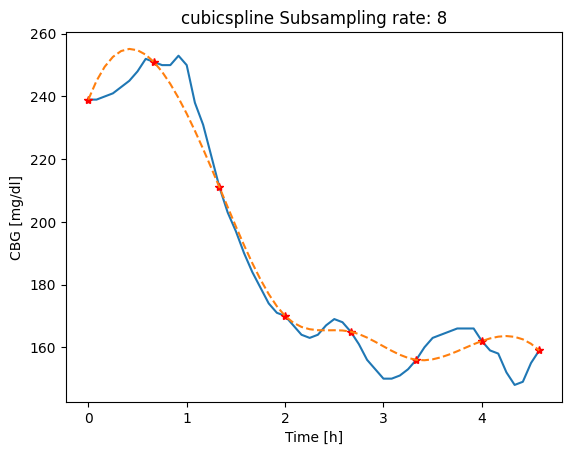

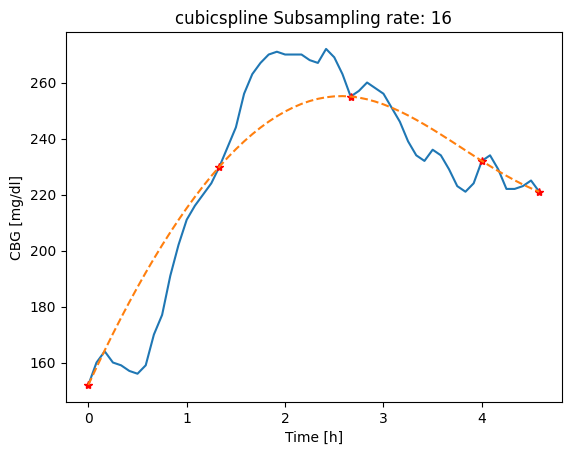

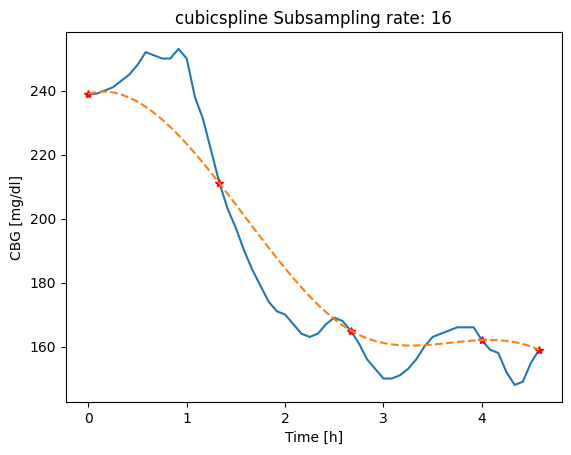

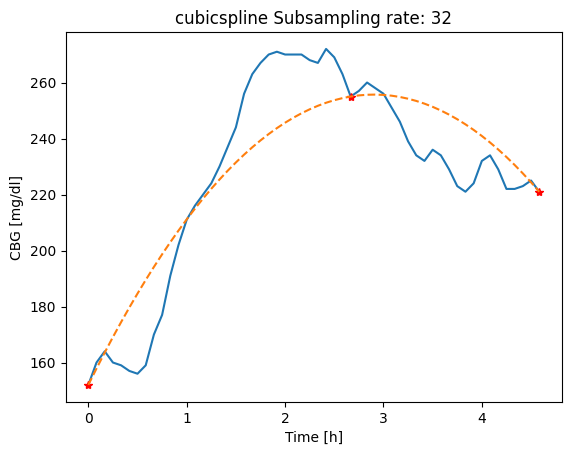

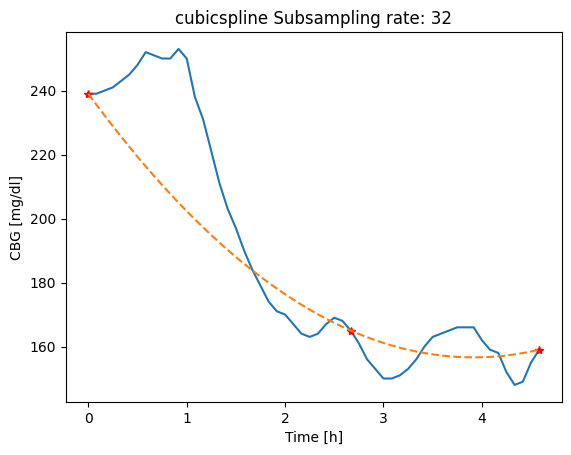

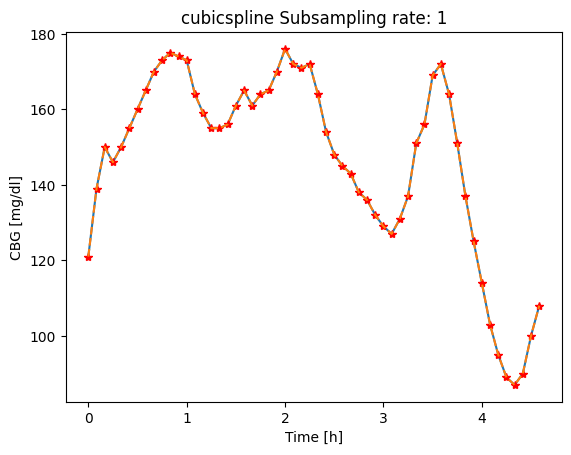

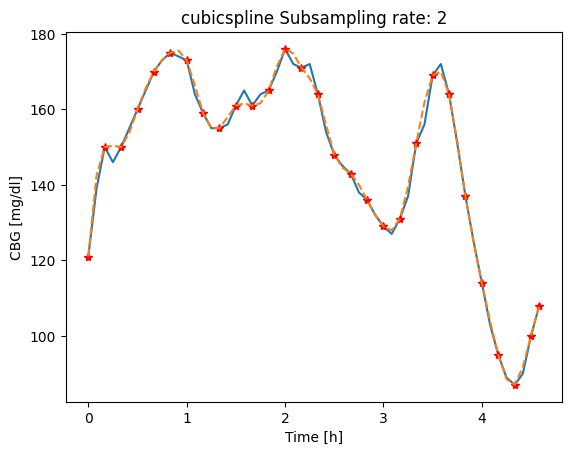

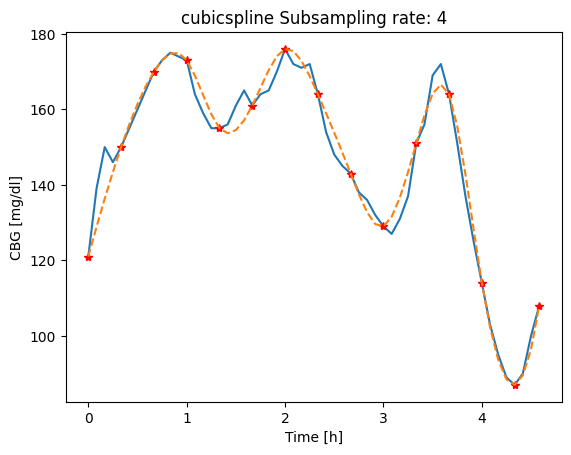

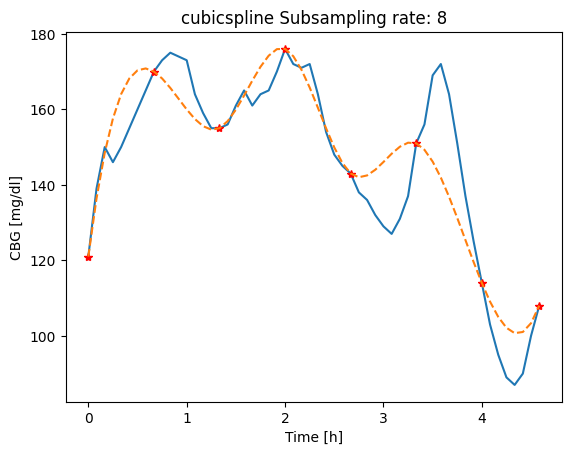

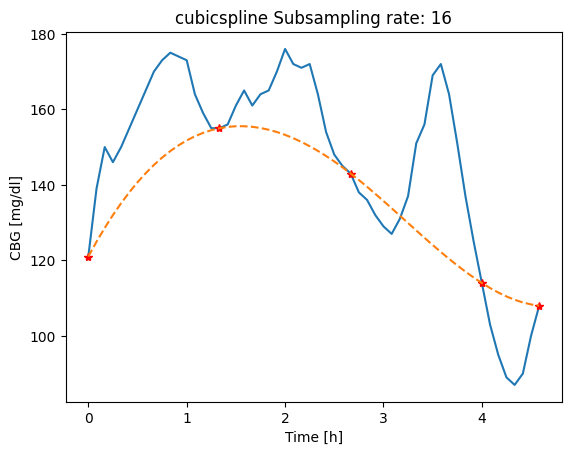

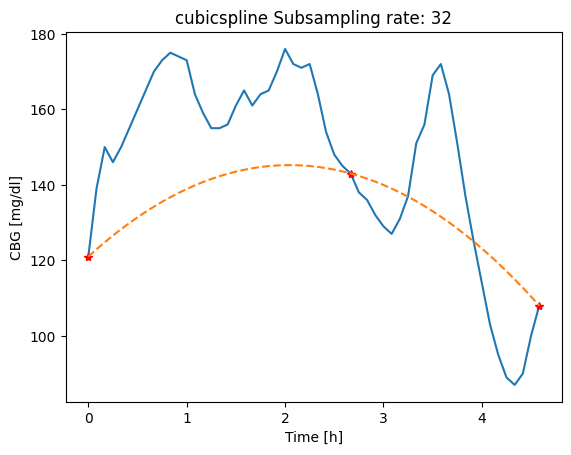

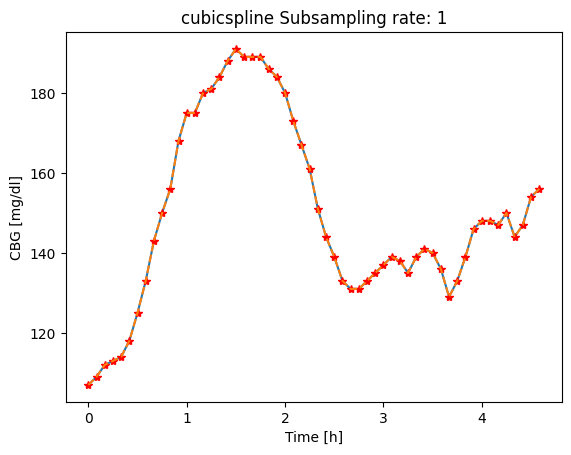

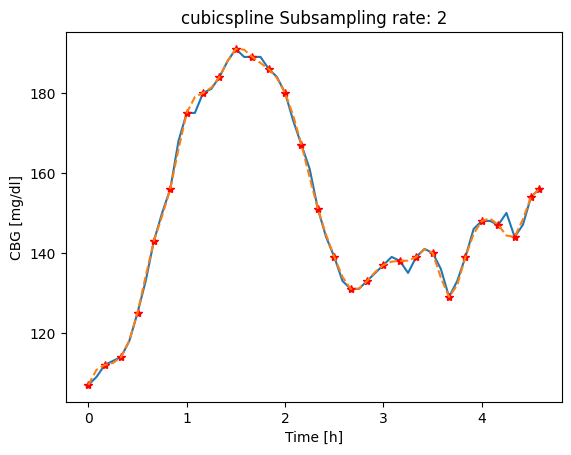

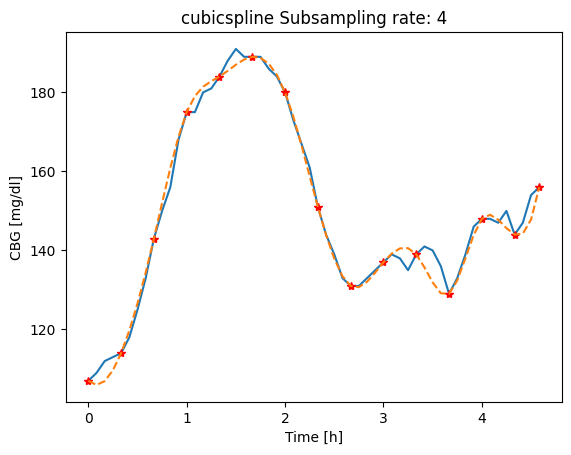

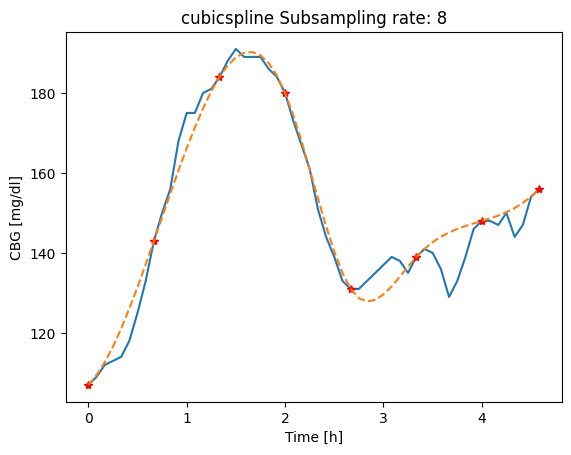

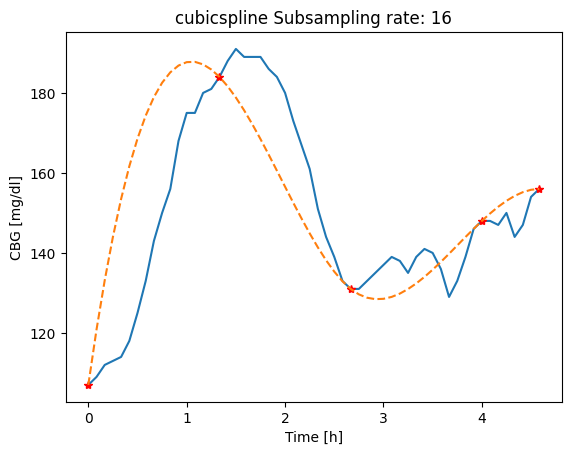

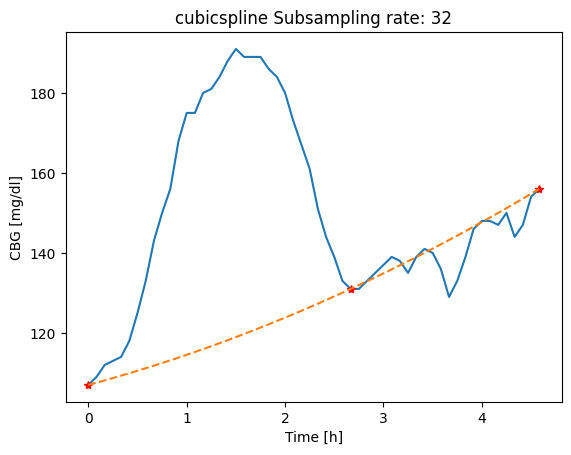

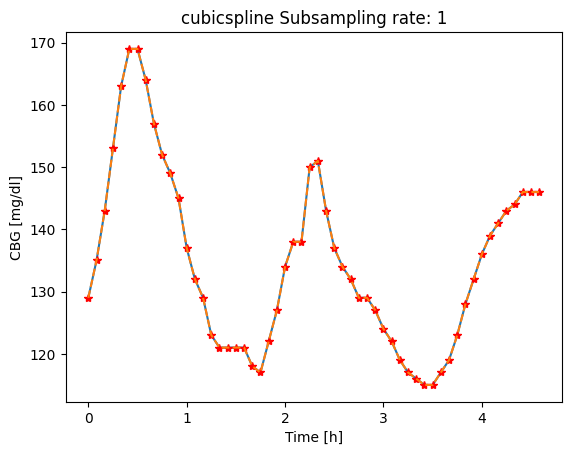

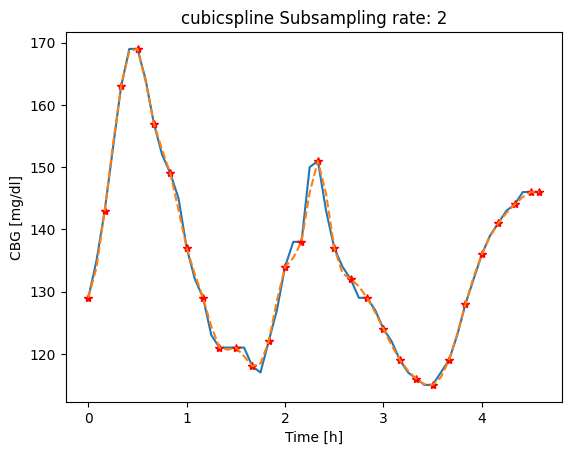

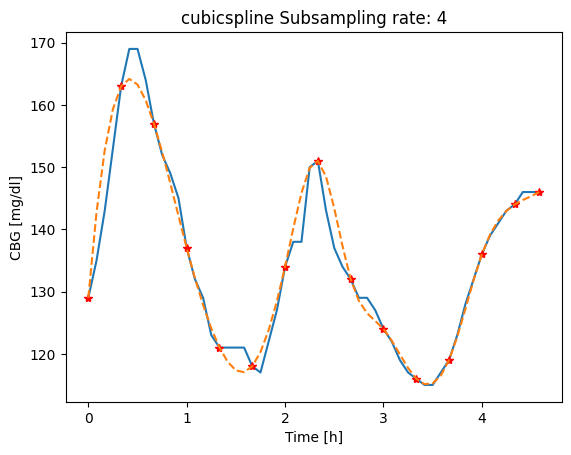

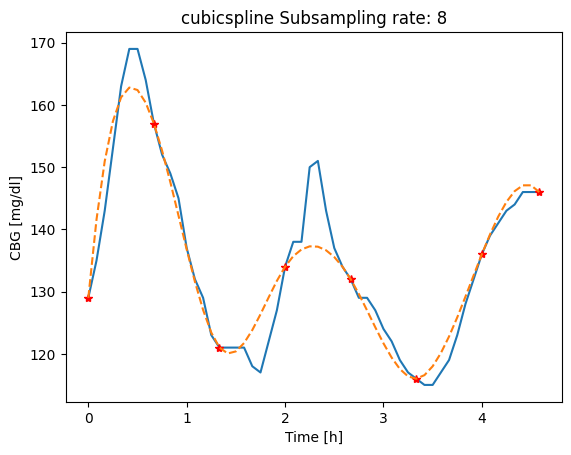

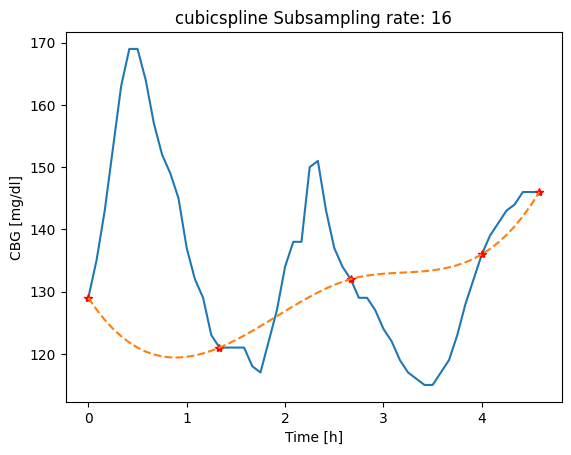

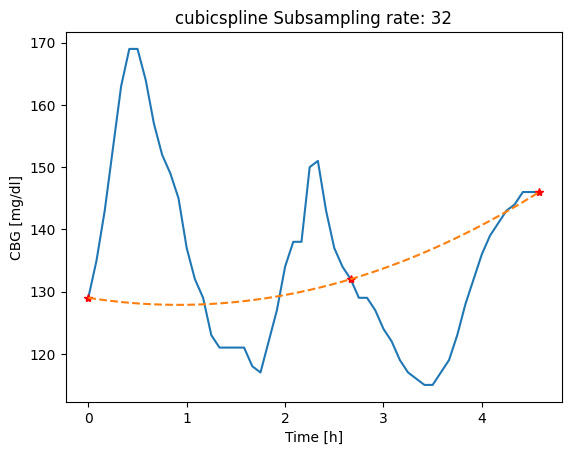

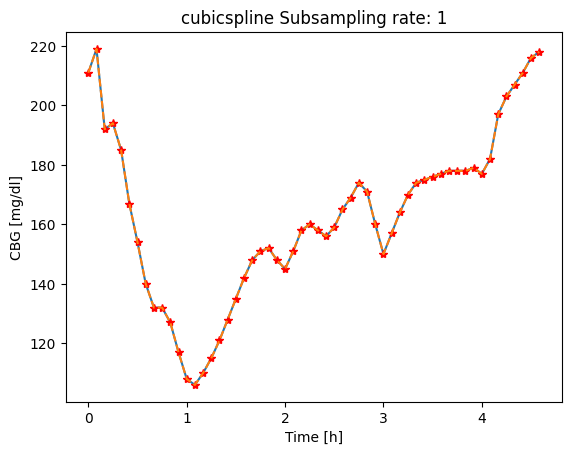

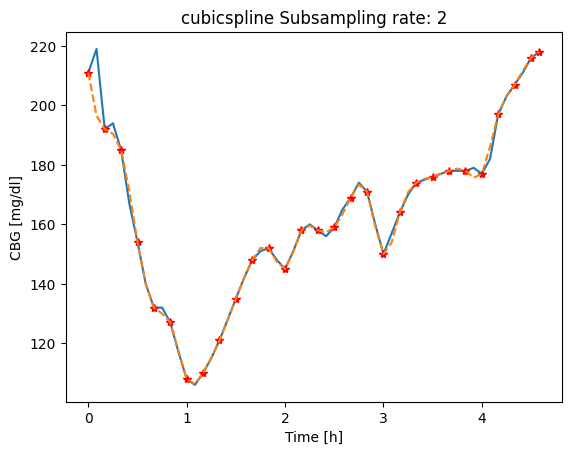

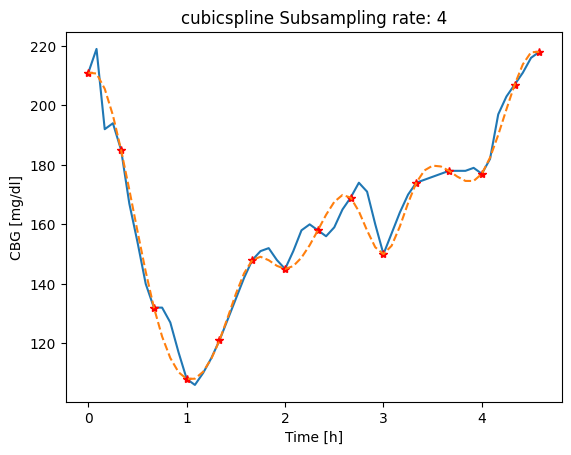

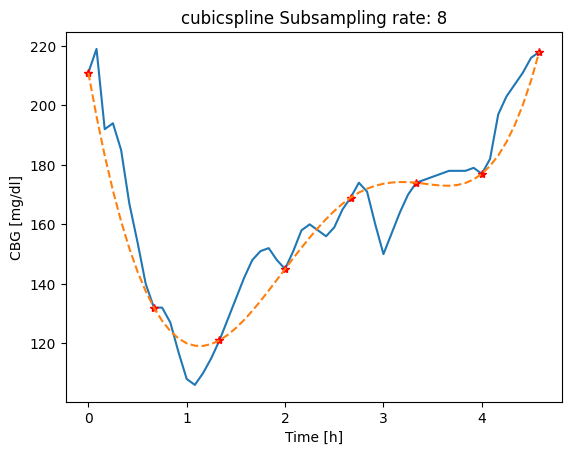

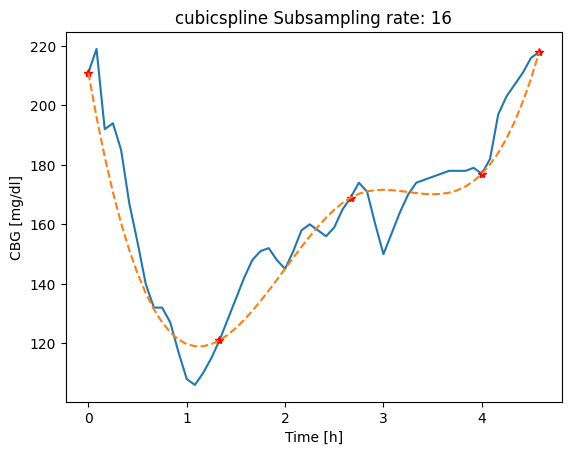

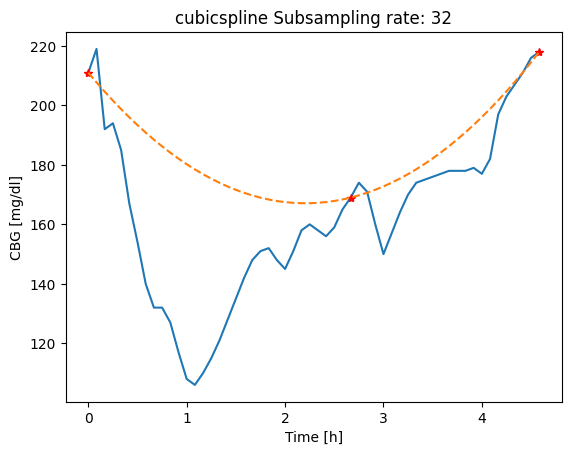

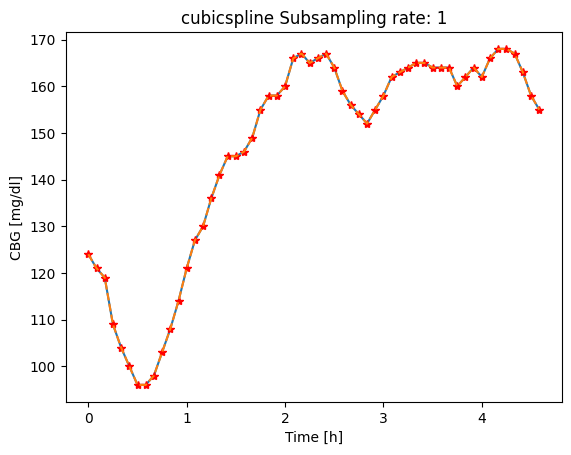

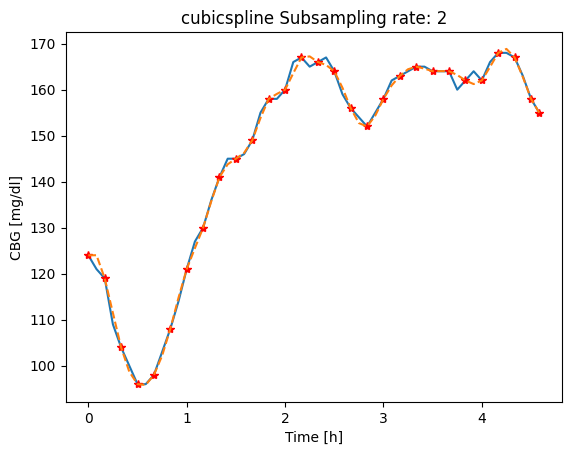

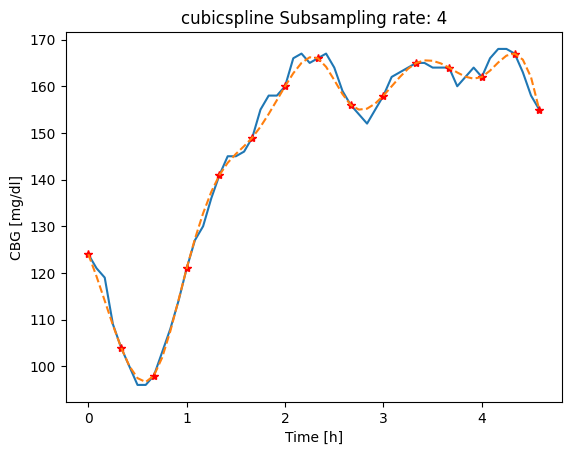

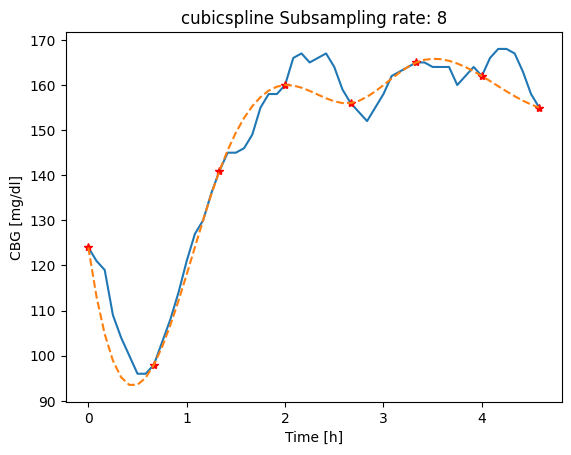

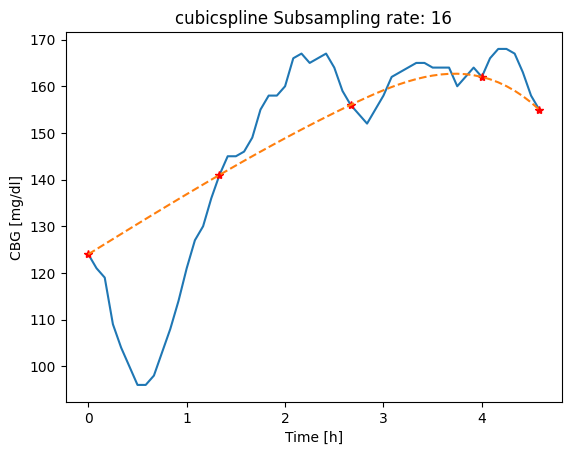

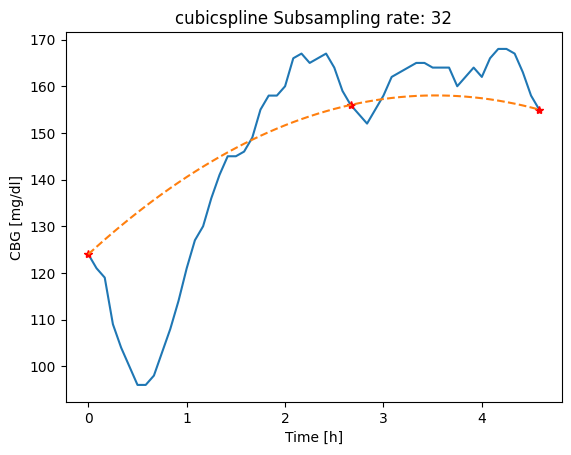

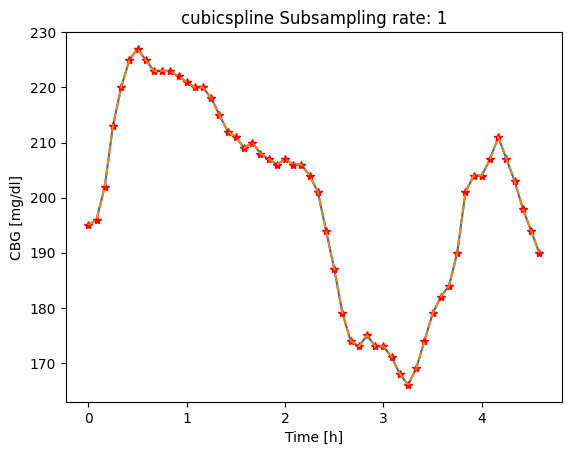

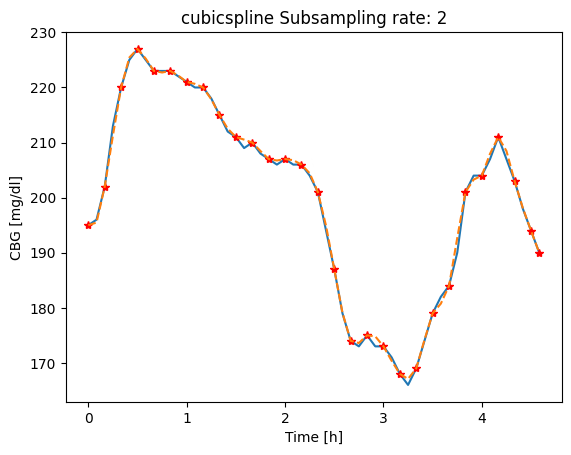

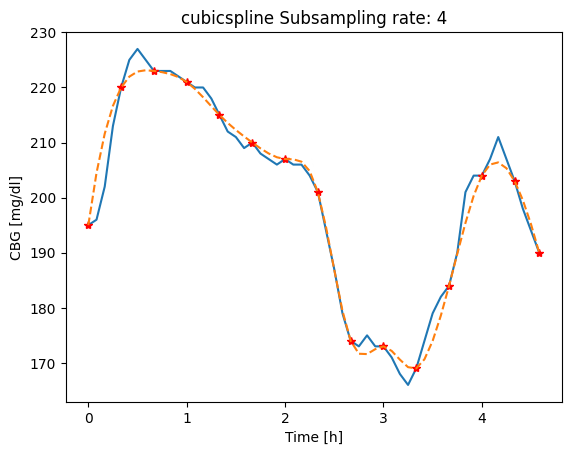

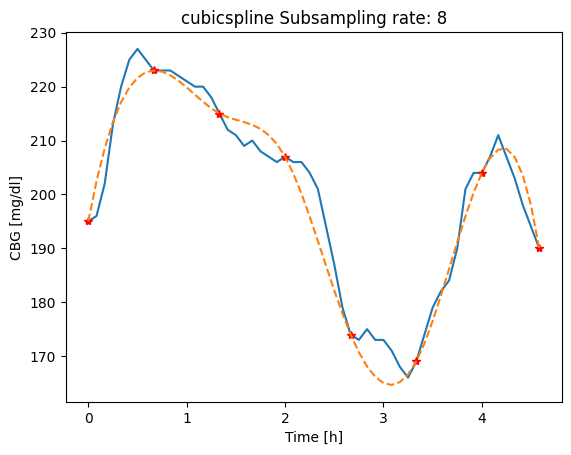

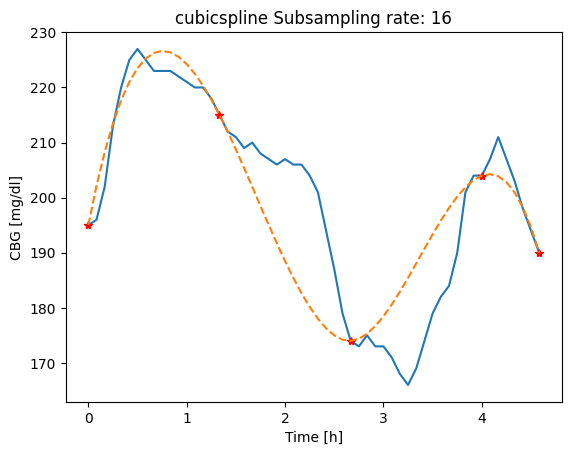

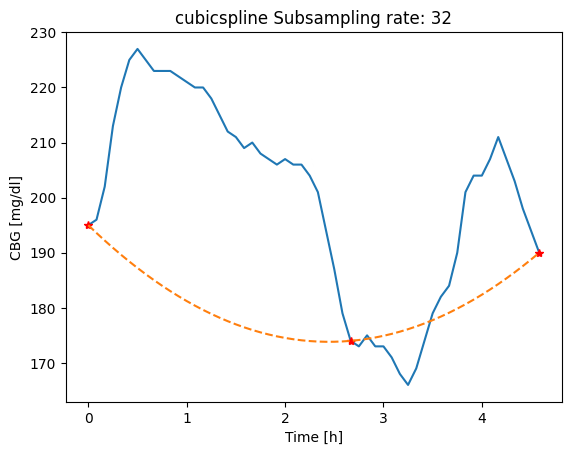

In [4]:
patients = {}
years = [2018, 2020]
for year in years:
    DATA_PATH = f"/Users/nathanhoffman/Library/Mobile Documents/com~apple~CloudDocs/UniBe/3. Semester/Data Driven Diabetes Management/DDDM-Project7/data/Ohio{year}_processed/train"
    files = os.listdir(DATA_PATH)
    for file in files:
        train_set_list, scaler = createDataSet(os.path.join(DATA_PATH, file))
        # Remove duplicates
        train_set_list = [train_set_list[x] for x, _ in enumerate(train_set_list) if train_set_list[x].equals(train_set_list[x-1]) is False]
        print(file)
        print(f"Number of Time Series: {len(train_set_list)}")
        patient_num = file.split("-")[0]
        patients[f"Patient {patient_num}"] = create_standard_metrics(train_set_list)
        

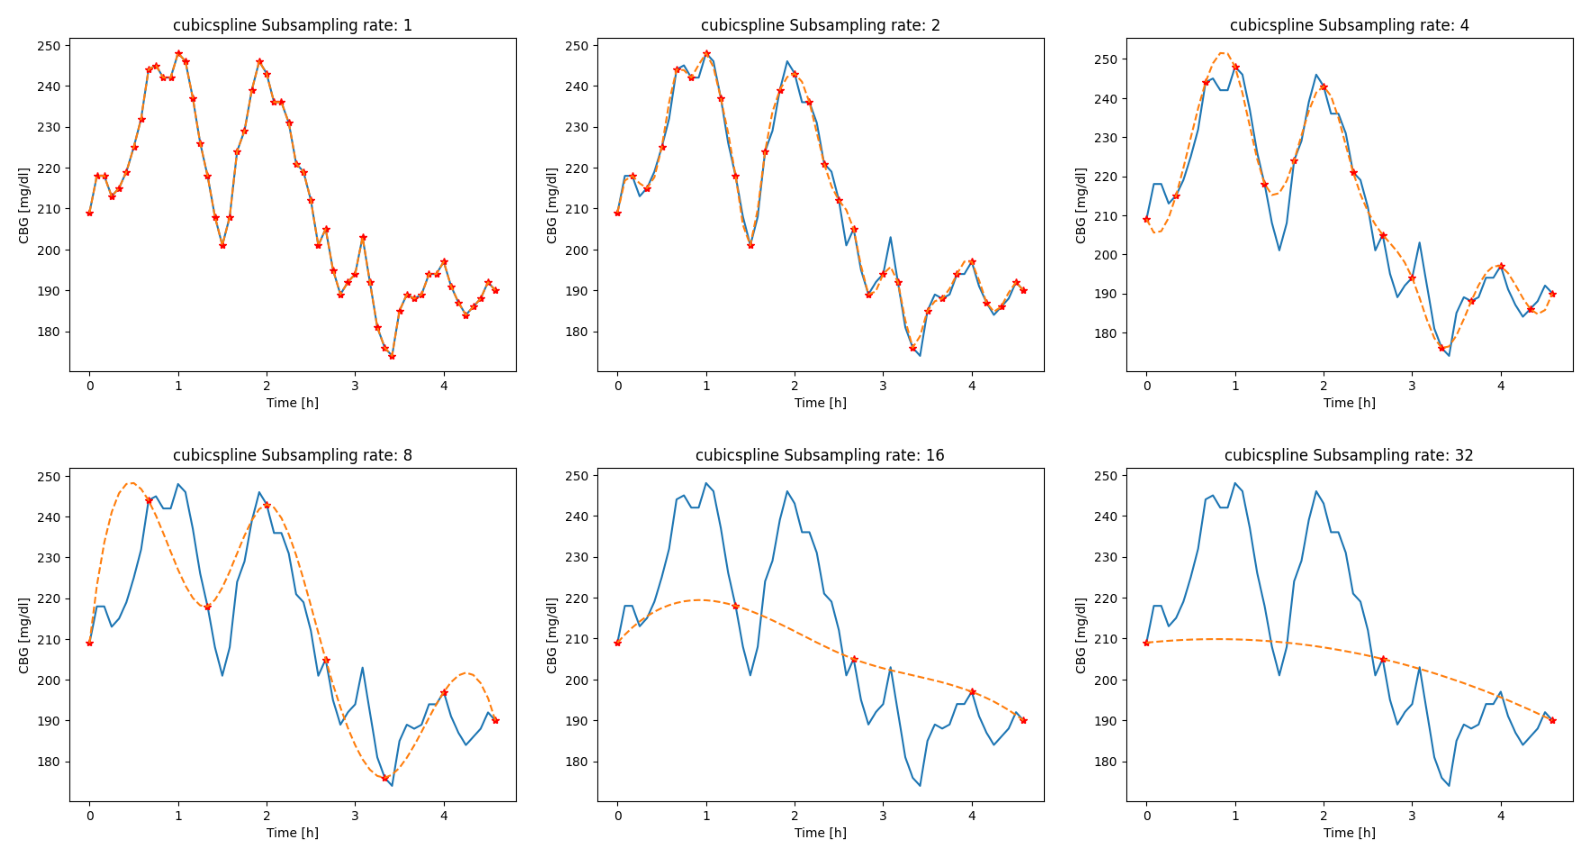

In [15]:
imgs = []
subsampling = [1, 2, 4, 8, 16, 32]
for i in subsampling:
    img = plt.imread(f"../../figures/SR{i}.png")
    imgs.append(img)
fig, axs = plt.subplots(2, 3, figsize=(16, 9), tight_layout=True)
axs[0, 0].imshow(imgs[0])
axs[0, 0].axis('off')
axs[0, 1].imshow(imgs[1])
axs[0, 1].axis('off')
axs[0, 2].imshow(imgs[2])
axs[0, 2].axis('off')
axs[1, 0].imshow(imgs[3])
axs[1, 0].axis('off')
axs[1, 1].imshow(imgs[4])
axs[1, 1].axis('off')
axs[1, 2].imshow(imgs[5])
axs[1, 2].axis('off')
plt.tight_layout()
plt.savefig("../../figures/SR_combined.png")


In [5]:
dfs = []

sorted_patients = dict(sorted(patients.items()))

for patient in patients:
    dfs.append(pd.DataFrame.from_dict(patients[patient][0]).T)
dfs[2]

Mean        Std  Time in range (70-180)  \
True                 136.816592  59.009308                0.697545   
Subsampling rate 1   136.816592  59.009308                0.697545   
Subsampling rate 2   136.792758  58.979726                0.693452   
Subsampling rate 4   136.733487  59.217773                0.690104   
Subsampling rate 8   137.112227  59.193182                0.691592   
Subsampling rate 16  136.368806  59.234037                0.691220   
Subsampling rate 32  127.482139  51.590286                0.753720   

                     Time in tight range (70-140)  Time in low (<70)  \
True                                     0.479911           0.109375   
Subsampling rate 1                       0.479911           0.109375   
Subsampling rate 2                       0.474330           0.112723   
Subsampling rate 4                       0.472098           0.113839   
Subsampling rate 8                       0.469494           0.113839   
Subsampling rate 16                      0.478051           0.112723   
Subsampling rate 32                      0.553199           0.108631   

                     Time in very low (<54)  Time in high (>180)  \
True                               0.026414             0.193080   
Subsampling rate 1                 0.026414             0.193080   
Subsampling rate 2                 0.026414             0.193824   
Subsampling rate 4                 0.028646             0.196057   
Subsampling rate 8                 0.028646             0.194568   
Subsampling rate 16                0.031250             0.196057   
Subsampling rate 32                0.040551             0.137649   

                     Time in very high (>250)         MSE  
True                                 0.045387         NaN  
Subsampling rate 1                   0.045387    0.000000  
Subsampling rate 2                   0.045387    1.304501  
Subsampling rate 4                   0.042411    5.976689  
Subsampling rate 8                   0.043899   28.154402  
Subsampling rate 16                  0.043155  119.048387  
Subsampling rate 32                  0.028274  418.671332

In [6]:
significance = {}
for patient in patients:
    significance[patient] = {}
    mean1 = patients[patient][0]["True"]["Mean"]
    std1=patients[patient][0]["True"]["Std"]
    nobs1=patients[patient][1]
    for subsample_rate in list(patients[patient][0].keys())[1:]:
        mean2=patients[patient][0][subsample_rate]["Mean"]
        std2=patients[patient][0][subsample_rate]["Std"]
        nobs2=patients[patient][1]
        result = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1,
                        mean2=mean2, std2=std2, nobs2=nobs2)
        print(patient, subsample_rate, result)
        p_value = result[1]
        if p_value <= 0.001:
            significance[patient][subsample_rate] = 3
        elif p_value <= 0.01:
            significance[patient][subsample_rate] = 2
            print(significance[patient][subsample_rate])
        elif p_value <= 0.05:
            significance[patient][subsample_rate] = 1
        else:
            significance[patient][subsample_rate] = 0

Patient 563 Subsampling rate 1 Ttest_indResult(statistic=0.0, pvalue=1.0)
Patient 563 Subsampling rate 2 Ttest_indResult(statistic=0.01229820709513357, pvalue=0.9901880691498794)
Patient 563 Subsampling rate 4 Ttest_indResult(statistic=0.047983353946116934, pvalue=0.9617309594680652)
Patient 563 Subsampling rate 8 Ttest_indResult(statistic=-0.3147220574657163, pvalue=0.7529826348565123)
Patient 563 Subsampling rate 16 Ttest_indResult(statistic=0.24253496216657944, pvalue=0.8083731988278463)
Patient 563 Subsampling rate 32 Ttest_indResult(statistic=0.8160352924703786, pvalue=0.41450937383213515)
Patient 588 Subsampling rate 1 Ttest_indResult(statistic=0.0, pvalue=1.0)
Patient 588 Subsampling rate 2 Ttest_indResult(statistic=0.03330176226919358, pvalue=0.9734344132337192)
Patient 588 Subsampling rate 4 Ttest_indResult(statistic=0.12214008746109845, pvalue=0.9027897906161988)
Patient 588 Subsampling rate 8 Ttest_indResult(statistic=-0.23162336958404273, pvalue=0.8168338688859037)
Patient 

/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/2609449502.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(rate, dfs[i].Mean[rate+1], "*"*v, c=c)
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/2609449502.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/2609449502.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

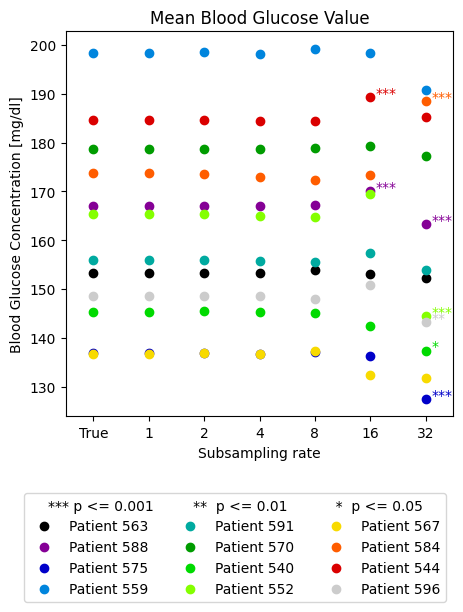

In [37]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig = plt.figure(figsize=(5,5))
for i, (c, patient) in enumerate(zip(color, patients)):
   plt.plot(dfs[i]["Mean"], "o",label=f"{patient}", c=c)
   for rate, v in enumerate(significance[patient].values()):
        if v == 3:
            plt.text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        elif v == 2:
            plt.text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        elif v == 1:
            plt.text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        else:
            plt.text(rate, dfs[i].Mean[rate+1], "*"*v, c=c)
      

plt.xticks([0, 1, 2, 3, 4, 5, 6], labels=["True", 1, 2, 4, 8, 16, 32])
plt.xlim(-0.5, 6.5)
plt.xlabel("Subsampling rate")
plt.ylabel("Blood Glucose Concentration [mg/dl]")
plt.legend(title="*** p <= 0.001         **  p <= 0.01           *  p <= 0.05", loc="lower left", ncol=len(dfs)//4, bbox_to_anchor=(-0.125, -0.50))
plt.title("Mean Blood Glucose Value")
plt.savefig("../../figures/all_patients_mean_cbg_values.png", bbox_inches='tight')

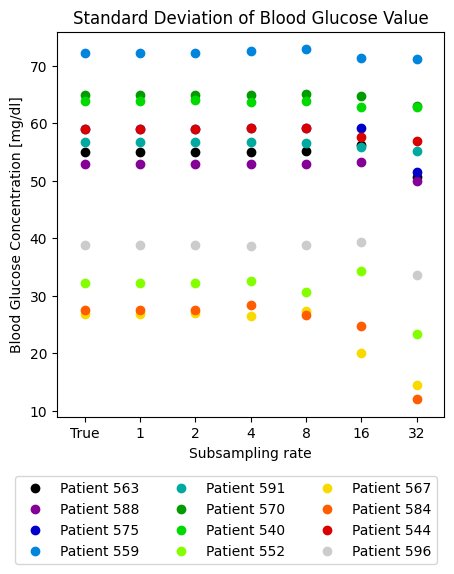

In [40]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig = plt.figure(figsize=(5,5))
for i, (c, patient) in enumerate(zip(color, patients)):
   plt.plot(dfs[i]["Std"], "o",label=f"{patient}", c=c)

plt.xticks([0, 1, 2, 3, 4, 5, 6], labels=["True", 1, 2, 4, 8, 16, 32])
plt.xlim(-0.5, 6.5)
plt.xlabel("Subsampling rate")
plt.ylabel("Blood Glucose Concentration [mg/dl]")
plt.legend(loc="lower left", ncol=len(dfs)//4, bbox_to_anchor=(-0.125, -0.4))
plt.title("Standard Deviation of Blood Glucose Value")
plt.savefig("../../figures/all_patients_std_cbg_values.png", bbox_inches='tight')

/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3639569996.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].text(rate, dfs[i].Mean[rate+1], "*"*v, c=c)
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3639569996.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs[0].text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3639569996.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

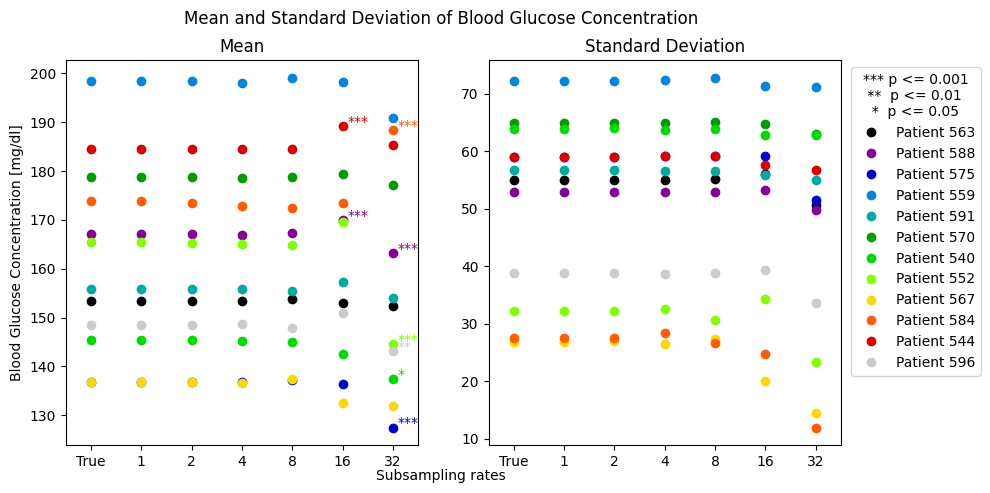

In [9]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig, axs = plt.subplots(1, 2, figsize=(10,5))

for i, (c, patient) in enumerate(zip(color, patients)):
   axs[0].plot(dfs[i]["Mean"], "o",label=f"{patient}", c=c)
   for rate, v in enumerate(significance[patient].values()):
        if v == 3:
            axs[0].text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        elif v == 2:
            axs[0].text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        elif v == 1:
            axs[0].text(rate+1.1, dfs[i].Mean[rate+1], "*"*v, c=c)
        else:
            axs[0].text(rate, dfs[i].Mean[rate+1], "*"*v, c=c)
axs[0].set_xticks([0, 1, 2, 3, 4, 5, 6])
axs[0].set_xticklabels(labels=["True", 1, 2, 4, 8, 16, 32])
axs[0].set_xlim(-0.5, 6.5)
# axs[0].set_xlabel("Subsampling rate")
axs[0].set_ylabel("Blood Glucose Concentration [mg/dl]")
axs[0].set_title("Mean")

for i, (c, patient) in enumerate(zip(color, patients)):
   axs[1].plot(dfs[i]["Std"], "o",label=f"{patient}", c=c)

plt.xticks([0, 1, 2, 3, 4, 5, 6], labels=["True", 1, 2, 4, 8, 16, 32])
plt.xlim(-0.5, 6.5)

plt.legend(title="*** p <= 0.001\n **  p <= 0.01\n  *  p <= 0.05",bbox_to_anchor=(1.01, 1.00))
plt.title("Standard Deviation")
fig.suptitle("Mean and Standard Deviation of Blood Glucose Concentration")
fig.text(0.5, 0.04, 'Subsampling rates', ha='center')
plt.savefig("../../figures/all_patients_mean_std_cbg_values.png", bbox_inches='tight')



/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3986875329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j].set_xticklabels(["True", 1, 2, 4, 8, 16, 32])
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3986875329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j].set_xticklabels(["True", 1, 2, 4, 8, 16, 32])
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3986875329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[j].set_xticklabels(["True", 1, 2, 4, 8, 16, 32])
/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/3986875329.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

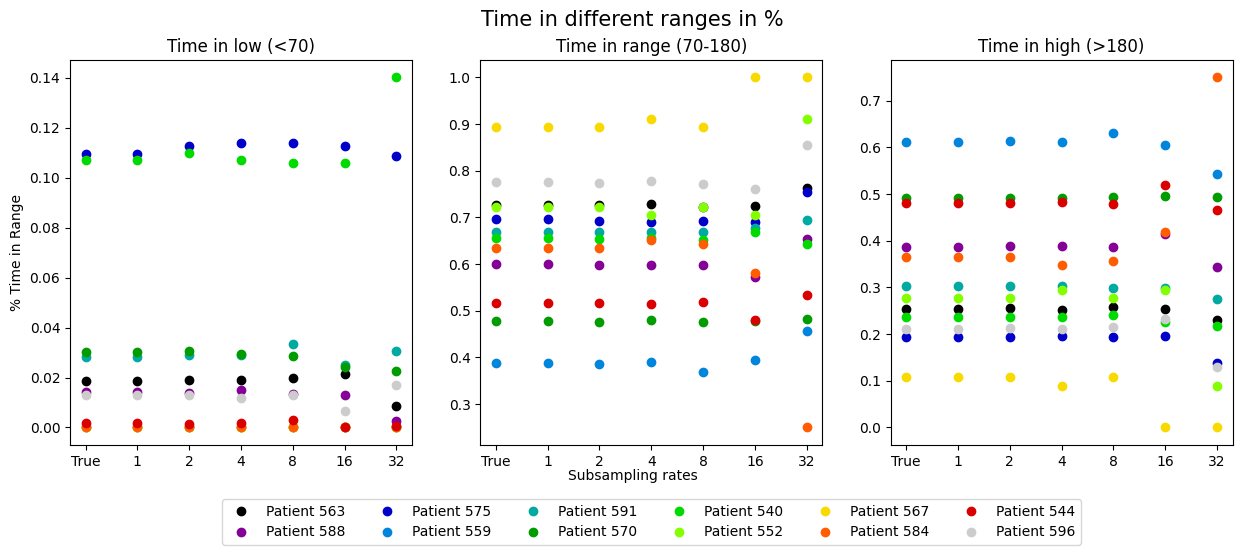

In [51]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig, axs = plt.subplots(1, 3, figsize=(15,5))
ranges = ["Time in low (<70)", "Time in range (70-180)", "Time in high (>180)"]
for j, range in enumerate(ranges):
    for i, (c, patient) in enumerate(zip(color, patients)):
        axs[j].plot(dfs[i][range], "o",label=f"{patient}", c=c)
        axs[j].set_title(range)
        axs[j].set_xticklabels(["True", 1, 2, 4, 8, 16, 32])
        if j == 0:
            axs[j].set_ylabel("% Time in Range")
axs[1].legend(loc="center", ncol=len(dfs)//2, bbox_to_anchor=(0.5, -0.2))
fig.text(0.5, 0.04, 'Subsampling rates', ha='center')
fig.suptitle("Time in different ranges in %", fontsize=15)
plt.savefig("../../figures/all_patients_time_in_full_range.png", bbox_inches='tight')


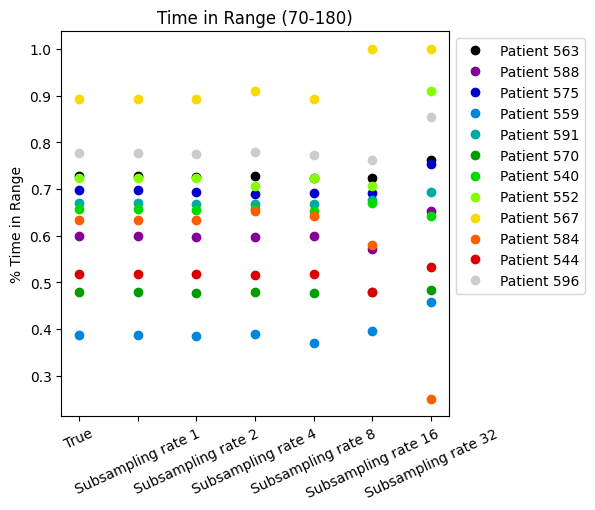

In [11]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig = plt.figure(figsize=(5,5))
for i, (c, patient) in enumerate(zip(color, patients)):
   plt.plot(dfs[i]["Time in range (70-180)"], "o",label=f"{patient}", c=c)
plt.xticks(rotation=25)
plt.ylabel("% Time in Range")
plt.title("Time in Range (70-180)")
plt.legend(bbox_to_anchor=(1.00, 1.00))
plt.savefig("../../figures/all_patients_time_in_range.png", bbox_inches='tight')


/var/folders/50/40hhzd5j4_5fr1sv5_b997z00000gn/T/ipykernel_15143/1084467220.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test = pd.concat([test, df["MSE"].to_frame().fillna(0).T])


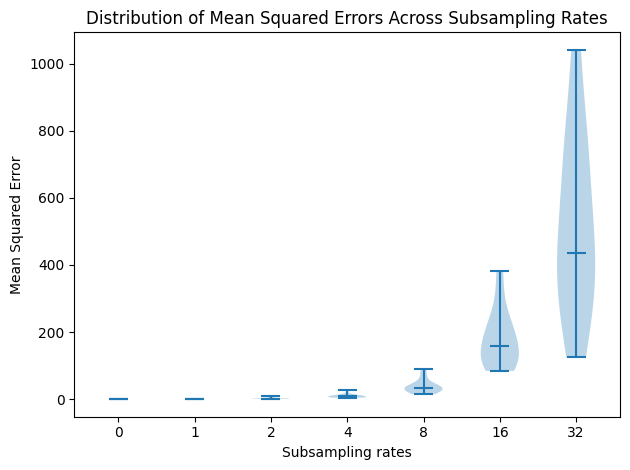

In [12]:
test = pd.DataFrame(columns=dfs[0].index.values)
for df in dfs:
    test = pd.concat([test, df["MSE"].to_frame().fillna(0).T])
test.reset_index(drop=True)
plt.violinplot(test, showmedians=True)
plt.xticks([1, 2, 3, 4, 5, 6, 7], labels=[0, 1, 2, 4, 8, 16, 32])
plt.title("Distribution of Mean Squared Errors Across Subsampling Rates")
plt.xlabel("Subsampling rates")
plt.ylabel("Mean Squared Error")
plt.tight_layout()
plt.savefig("../../figures/distribution_mses.png", bbox_inches='tight')

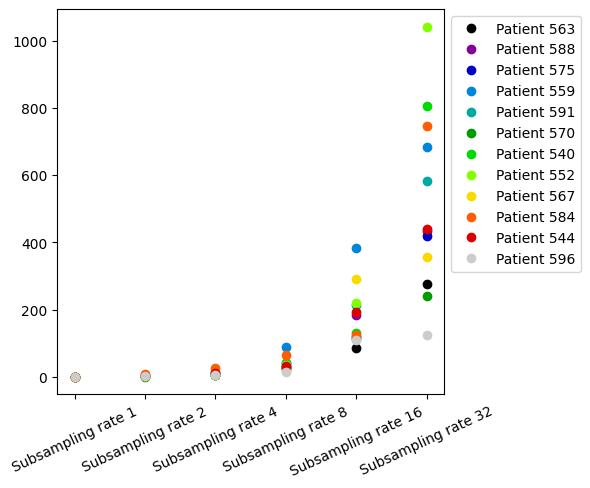

In [13]:
color = plt.cm.nipy_spectral(np.linspace(0, 1, len(dfs)))
fig = plt.figure(figsize=(5,5))
for i, (c, patient) in enumerate(zip(color, patients)):
   plt.plot(dfs[i]["MSE"], "o",label=f"{patient}", c=c)
        
plt.xticks(rotation=25)
plt.legend(bbox_to_anchor=(1.00, 1.00))